In [1]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('Tatanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
238,239.0,0.0,2.0,"Pengelly, Mr. Frederick William",male,19.0,0.0,0.0,28665,10.5000,NaN,S
239,240.0,0.0,2.0,"Hunt, Mr. George Henry",male,33.0,0.0,0.0,SCO/W 1585,12.2750,NaN,S
240,241.0,0.0,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C
241,242.0,1.0,3.0,"Murphy, Miss. Katherine ""Kate""",female,NaN,1.0,0.0,367230,15.5000,NaN,NaN


In [5]:
df.isnull().sum()

PassengerId      1
Survived         1
Pclass           1
Name             1
Sex              1
Age             49
SibSp            1
Parch            1
Ticket           1
Fare             1
Cabin          197
Embarked         3
dtype: int64

In [8]:
m_df=df[['Survived','Pclass','Sex','Fare','Age']]

In [9]:
m_df

,Survived,Pclass,Sex,Fare,Age
0,0.0,3.0,male,7.2500,22.0
1,1.0,1.0,female,71.2833,38.0
2,1.0,3.0,female,7.9250,26.0
3,1.0,1.0,female,53.1000,35.0
4,0.0,3.0,male,8.0500,35.0
...,...,...,...,...,...
238,0.0,2.0,male,10.5000,19.0
239,0.0,2.0,male,12.2750,33.0
240,0.0,3.0,female,14.4542,NaN
241,1.0,3.0,female,15.5000,NaN


In [11]:
m_df.isnull().sum()

Survived     1
Pclass       1
Sex          1
Fare         1
Age         49
dtype: int64

In [19]:
import math
mean=m_df['Age'].mean()
m_df['Age']=m_df.Age.fillna(mean)

/var/folders/dt/lqqrt0ns4k71_6g270kc_x9w0000gn/T/ipykernel_19423/3125285137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df['Age']=m_df.Age.fillna(mean)


In [24]:
m_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Fare        0
Age         0
dtype: int64

In [32]:
m_df.dropna(inplace=True)

/var/folders/dt/lqqrt0ns4k71_6g270kc_x9w0000gn/T/ipykernel_19423/3168661069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df.dropna(inplace=True)


In [34]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
m_df['Sex']=lab.fit_transform(m_df.Sex)


/var/folders/dt/lqqrt0ns4k71_6g270kc_x9w0000gn/T/ipykernel_19423/301957431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df['Sex']=lab.fit_transform(m_df.Sex)


Male->1
Female-0

In [35]:
m_df['Sex']


0      1
1      0
2      0
3      0
4      1
      ..
237    0
238    1
239    1
240    0
241    0
Name: Sex, Length: 242, dtype: int64

In [38]:
data=m_df.drop(['Survived'],axis="columns")
data

,Pclass,Sex,Fare,Age
0,3.0,1,7.2500,22.000000
1,1.0,0,71.2833,38.000000
2,3.0,0,7.9250,26.000000
3,1.0,0,53.1000,35.000000
4,3.0,1,8.0500,35.000000
...,...,...,...,...
237,2.0,0,26.2500,8.000000
238,2.0,1,10.5000,19.000000
239,2.0,1,12.2750,33.000000
240,3.0,0,14.4542,28.024897


In [39]:
target=m_df['Survived']
target

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
237    1.0
238    0.0
239    0.0
240    0.0
241    1.0
Name: Survived, Length: 242, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2)

In [42]:
len(X_train)

193

In [44]:
len(X_test)

49

In [66]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=40)

In [67]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [68]:
model.score(X_test,y_test)

0.7959183673469388

In [70]:
y_predict=model.predict(X_test)
y_predict

array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.])

In [72]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,y_predict)

<AxesSubplot:>

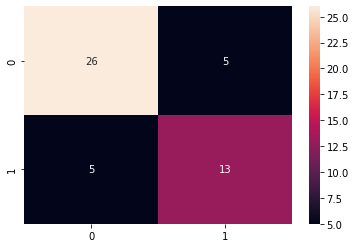

In [76]:
import seaborn as sn
sn.heatmap(con,annot=True)